# Predicting EUR/USD exchange rate

This notebook model predicts EUR/USD exchange rate using the pervious EUR pricing and sentiment around EUR and USD obtained from Twitter.

## Loading the data

Set the working directory and load eur pricing along with Twitter sentiment about Euro and US dollar.

In [1]:
import os

os.chdir("/media/dftortosa/Windows/Users/dftor/Documents/diego_docs/industry/data_incubator/capstone_project/")
os.getcwd()

'/media/dftortosa/Windows/Users/dftor/Documents/diego_docs/industry/data_incubator/capstone_project'

In [2]:
import pandas as pd
import numpy as np

eur_pricing = pd.read_csv("results/eur_pricing_data.csv.gz", compression="gzip")
eur_pricing

,date,eur_usd_rate,previous_eur_pricing,5_days_rolling_mean_pricing,10_days_rolling_mean_pricing,60_days_rolling_mean_pricing,120_days_rolling_mean_pricing,5_days_exp_rolling_mean_pricing,10_days_exp_rolling_mean_pricing,60_days_exp_rolling_mean_pricing,120_days_exp_rolling_mean_pricing
0,1999-06-21,1.0339,1.0388,1.03804,1.04017,1.060603,1.092362,1.038175,1.040002,1.062343,1.087234
1,1999-06-22,1.0313,1.0339,1.03608,1.04040,1.060015,1.091153,1.036750,1.038892,1.061410,1.086353
2,1999-06-23,1.0280,1.0313,1.03450,1.03968,1.059352,1.089922,1.034933,1.037512,1.060423,1.085443
3,1999-06-24,1.0321,1.0280,1.03320,1.03782,1.058582,1.088703,1.032622,1.035782,1.059360,1.084493
4,1999-06-25,1.0443,1.0321,1.03282,1.03629,1.057830,1.087611,1.032448,1.035113,1.058466,1.083627
...,...,...,...,...,...,...,...,...,...,...,...
5933,2022-08-22,1.0001,1.0054,1.01444,1.02030,1.034628,1.057292,1.014329,1.017477,1.033201,1.055635
5934,2022-08-23,0.9927,1.0001,1.01056,1.01832,1.033357,1.056397,1.009586,1.014317,1.032116,1.054717
5935,2022-08-24,0.9934,0.9927,1.00648,1.01525,1.032047,1.055562,1.003957,1.010387,1.030824,1.053692
5936,2022-08-25,0.9970,0.9934,1.00188,1.01207,1.030750,1.054761,1.000438,1.007298,1.029597,1.052696


In [3]:
twitter_sentiment_eur = pd.read_csv("results/twitter_sentiment_data_eur.csv.gz", compression="gzip")
twitter_sentiment_eur

,date,quantile_0.05_sent_eur_previous_1_days,quantile_0.1_sent_eur_previous_1_days,quantile_0.2_sent_eur_previous_1_days,quantile_0.3_sent_eur_previous_1_days,quantile_0.4_sent_eur_previous_1_days,quantile_0.5_sent_eur_previous_1_days,quantile_0.6_sent_eur_previous_1_days,quantile_0.7_sent_eur_previous_1_days,quantile_0.8_sent_eur_previous_1_days,...,quantile_0.95_sent_eur_previous_15_days,mean_sent_eur_previous_15_days,min_sent_eur_previous_15_days,max_sent_eur_previous_15_days,sum_sent_eur_previous_15_days,count_sent_eur_previous_15_days,range_sent_eur_previous_15_days,var_sent_eur_previous_15_days,std_sent_eur_previous_15_days,iqr_sent_eur_previous_15_days
0,2008-10-09,-0.464215,-0.27320,-0.14796,0.00000,0.16630,0.2263,0.22630,0.22630,0.30340,...,0.000000,0.000000,0.0000,0.0000,0.0000,2.0,0.0000,0.000000,0.000000,0.000000
1,2008-10-10,-0.421500,-0.42150,-0.37326,-0.28336,-0.10000,0.0000,0.00000,0.08880,0.30044,...,-0.144280,-0.443288,-0.6808,-0.0516,-3.5463,8.0,0.6292,0.041444,0.190429,0.226825
2,2008-10-11,-0.566100,-0.56030,-0.53898,-0.52670,-0.52670,-0.5267,-0.52670,-0.46358,-0.16238,...,0.538165,-0.159530,-0.5574,0.7003,-1.5953,10.0,1.2577,0.177070,0.399203,0.510600
3,2008-10-12,-0.443665,-0.12233,0.25262,0.40924,0.46062,0.5010,0.52670,0.52670,0.52670,...,0.706835,0.075140,-0.7311,0.7841,0.7514,10.0,1.5152,0.269558,0.492546,0.757350
4,2008-11-24,-0.263670,-0.25414,-0.23508,-0.21602,-0.19696,-0.1779,-0.14232,-0.10674,-0.07116,...,0.672170,0.504500,0.3182,0.6908,1.0090,2.0,0.3726,0.069415,0.186300,0.186300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4967,2022-08-20,-0.817600,-0.73698,-0.54230,-0.32233,-0.07720,0.0000,0.17790,0.36120,0.49012,...,0.856340,0.005388,-0.9509,0.9699,2.3437,435.0,1.9208,0.308111,0.554439,0.976150
4968,2022-08-21,-0.840425,-0.76145,-0.59600,-0.37150,-0.15480,0.0000,0.12800,0.34000,0.51870,...,0.805240,-0.068454,-0.9716,0.9590,-20.3308,297.0,1.9306,0.258977,0.508040,0.782000
4969,2022-08-22,-0.848100,-0.79559,-0.62490,-0.44865,-0.23486,0.0000,0.03332,0.31820,0.46238,...,0.815185,0.029901,-0.9805,0.9626,11.0633,370.0,1.9431,0.285555,0.533651,0.878600
4970,2022-08-23,-0.825720,-0.70858,-0.55438,-0.36120,-0.12800,0.0000,0.03186,0.29456,0.44040,...,0.823200,0.026195,-0.9625,0.9371,11.2901,431.0,1.8996,0.282923,0.531287,0.869900


In [4]:
twitter_sentiment_usd = pd.read_csv("results/twitter_sentiment_data_usd.csv.gz", compression="gzip")
twitter_sentiment_usd

,date,quantile_0.05_sent_usd_previous_1_days,quantile_0.1_sent_usd_previous_1_days,quantile_0.2_sent_usd_previous_1_days,quantile_0.3_sent_usd_previous_1_days,quantile_0.4_sent_usd_previous_1_days,quantile_0.5_sent_usd_previous_1_days,quantile_0.6_sent_usd_previous_1_days,quantile_0.7_sent_usd_previous_1_days,quantile_0.8_sent_usd_previous_1_days,...,quantile_0.95_sent_usd_previous_15_days,mean_sent_usd_previous_15_days,min_sent_usd_previous_15_days,max_sent_usd_previous_15_days,sum_sent_usd_previous_15_days,count_sent_usd_previous_15_days,range_sent_usd_previous_15_days,var_sent_usd_previous_15_days,std_sent_usd_previous_15_days,iqr_sent_usd_previous_15_days
0,2009-06-08,-0.391100,-0.32770,-0.25418,-0.22518,-0.17880,-0.00,0.00000,0.20400,0.35148,...,0.245880,0.091067,-0.0000,0.2732,0.2732,3.0,0.2732,0.024879,0.128788,0.136600
1,2009-06-09,-0.526700,-0.52670,-0.44330,-0.28638,-0.06364,0.00,0.00000,0.00000,0.00000,...,0.480525,0.185367,-0.0000,0.4939,1.1122,6.0,0.4939,0.052675,0.209513,0.374775
2,2009-06-10,-0.326940,-0.10898,0.00000,0.00000,0.00000,-0.00,0.00000,0.00000,0.00000,...,0.223290,-0.051267,-0.4019,0.2481,-0.1538,3.0,0.6500,0.107596,0.267826,0.325000
3,2009-06-11,-0.725885,-0.59397,-0.33512,0.00000,0.00000,0.35,0.41328,0.54754,0.60154,...,0.447560,-0.101237,-0.8622,0.7814,-4.9606,49.0,1.6436,0.140303,0.370729,0.509800
4,2009-06-12,-0.376910,-0.24554,-0.14400,0.00000,0.00000,0.00,0.00000,0.00000,0.00000,...,0.701780,0.361800,-0.0516,0.7351,1.0854,3.0,0.7867,0.155930,0.322418,0.393350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4792,2022-08-20,-0.736730,-0.57896,-0.38180,-0.16130,0.00000,-0.00,0.00000,0.25000,0.44040,...,0.700300,-0.050351,-0.9418,0.9633,-31.3181,622.0,1.9051,0.203222,0.450439,0.653100
4793,2022-08-21,-0.802420,-0.62970,-0.41006,-0.20744,0.00000,-0.00,0.00000,0.28384,0.47312,...,0.783040,0.029639,-0.9686,0.8885,5.6017,189.0,1.8571,0.184094,0.427926,0.644800
4794,2022-08-22,-0.659880,-0.55641,-0.42432,-0.31302,-0.12800,0.00,0.00000,0.00000,0.31672,...,0.726750,-0.034770,-0.9309,0.9267,-5.9457,171.0,1.8576,0.192045,0.436946,0.626700
4795,2022-08-23,-0.755980,-0.63690,-0.45880,-0.25000,0.00000,-0.00,0.00000,0.22630,0.42042,...,0.700300,-0.062026,-0.9134,0.9690,-28.6558,462.0,1.8824,0.197261,0.443659,0.681550


Merge into one single dataset:

In [5]:
from functools import reduce

#merge them using reduce
df_merged = reduce(lambda left, right: pd.merge(left, right, on=['date'], how='inner'), [eur_pricing, twitter_sentiment_eur, twitter_sentiment_usd])
    #leave only those rows having date in the datasets of currency value and EUR/USD sentiment
    #https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes
df_merged
    #note that here the previous eur pricing can be different than the eur pricing of the previous row
    #because when merging we lose days without tweet sentiment, so there is no longer continuous days

,date,eur_usd_rate,previous_eur_pricing,5_days_rolling_mean_pricing,10_days_rolling_mean_pricing,60_days_rolling_mean_pricing,120_days_rolling_mean_pricing,5_days_exp_rolling_mean_pricing,10_days_exp_rolling_mean_pricing,60_days_exp_rolling_mean_pricing,...,quantile_0.95_sent_usd_previous_15_days,mean_sent_usd_previous_15_days,min_sent_usd_previous_15_days,max_sent_usd_previous_15_days,sum_sent_usd_previous_15_days,count_sent_usd_previous_15_days,range_sent_usd_previous_15_days,var_sent_usd_previous_15_days,std_sent_usd_previous_15_days,iqr_sent_usd_previous_15_days
0,2009-06-08,1.3866,1.4177,1.41874,1.40710,1.344202,1.329956,1.414169,1.405729,1.352455,...,0.245880,0.091067,-0.0000,0.2732,0.2732,3.0,0.2732,0.024879,0.128788,0.136600
1,2009-06-09,1.3959,1.3866,1.41166,1.40566,1.346002,1.330394,1.404979,1.402251,1.353575,...,0.480525,0.185367,-0.0000,0.4939,1.1122,6.0,0.4939,0.052675,0.209513,0.374775
2,2009-06-10,1.4102,1.3959,1.40608,1.40617,1.347963,1.330768,1.401953,1.401096,1.354963,...,0.223290,-0.051267,-0.4019,0.2481,-0.1538,3.0,0.6500,0.107596,0.267826,0.325000
3,2009-06-11,1.3969,1.4102,1.40398,1.40818,1.349958,1.331112,1.404702,1.402752,1.356774,...,0.447560,-0.101237,-0.8622,0.7814,-4.9606,49.0,1.6436,0.140303,0.370729,0.509800
4,2009-06-12,1.4004,1.3969,1.40146,1.40931,1.351503,1.331037,1.402101,1.401688,1.358089,...,0.701780,0.361800,-0.0516,0.7351,1.0854,3.0,0.7867,0.155930,0.322418,0.393350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,2022-08-18,1.0178,1.0164,1.02226,1.02212,1.036607,1.058989,1.019290,1.020685,1.034698,...,0.681800,-0.019531,-0.9097,0.9337,-10.4688,536.0,1.8434,0.187248,0.432318,0.636000
3363,2022-08-19,1.0054,1.0178,1.01906,1.02209,1.035742,1.058169,1.018794,1.020160,1.034144,...,0.730185,-0.025299,-0.9628,0.9118,-9.5631,378.0,1.8746,0.192509,0.438177,0.677350
3364,2022-08-22,1.0001,1.0054,1.01444,1.02030,1.034628,1.057292,1.014329,1.017477,1.033201,...,0.726750,-0.034770,-0.9309,0.9267,-5.9457,171.0,1.8576,0.192045,0.436946,0.626700
3365,2022-08-23,0.9927,1.0001,1.01056,1.01832,1.033357,1.056397,1.009586,1.014317,1.032116,...,0.700300,-0.062026,-0.9134,0.9690,-28.6558,462.0,1.8824,0.197261,0.443659,0.681550


Subset the data selecting only predictors, including EUR pricing, EUR and USD sentiment:

In [6]:
predictors = df_merged[[column for column in df_merged.columns if "sent_eur_previous" in column or "sent_usd_previous" in column or "previous_eur_pricing" in column or "rolling_mean" in column]]
predictors

,previous_eur_pricing,5_days_rolling_mean_pricing,10_days_rolling_mean_pricing,60_days_rolling_mean_pricing,120_days_rolling_mean_pricing,5_days_exp_rolling_mean_pricing,10_days_exp_rolling_mean_pricing,60_days_exp_rolling_mean_pricing,120_days_exp_rolling_mean_pricing,quantile_0.05_sent_eur_previous_1_days,...,quantile_0.95_sent_usd_previous_15_days,mean_sent_usd_previous_15_days,min_sent_usd_previous_15_days,max_sent_usd_previous_15_days,sum_sent_usd_previous_15_days,count_sent_usd_previous_15_days,range_sent_usd_previous_15_days,var_sent_usd_previous_15_days,std_sent_usd_previous_15_days,iqr_sent_usd_previous_15_days
0,1.4177,1.41874,1.40710,1.344202,1.329956,1.414169,1.405729,1.352455,1.344919,-0.593980,...,0.245880,0.091067,-0.0000,0.2732,0.2732,3.0,0.2732,0.024879,0.128788,0.136600
1,1.3866,1.41166,1.40566,1.346002,1.330394,1.404979,1.402251,1.353575,1.345608,-0.868900,...,0.480525,0.185367,-0.0000,0.4939,1.1122,6.0,0.4939,0.052675,0.209513,0.374775
2,1.3959,1.40608,1.40617,1.347963,1.330768,1.401953,1.401096,1.354963,1.346439,-0.664245,...,0.223290,-0.051267,-0.4019,0.2481,-0.1538,3.0,0.6500,0.107596,0.267826,0.325000
3,1.4102,1.40398,1.40818,1.349958,1.331112,1.404702,1.402752,1.356774,1.347493,-0.860135,...,0.447560,-0.101237,-0.8622,0.7814,-4.9606,49.0,1.6436,0.140303,0.370729,0.509800
4,1.3969,1.40146,1.40931,1.351503,1.331037,1.402101,1.401688,1.358089,1.348310,-0.930000,...,0.701780,0.361800,-0.0516,0.7351,1.0854,3.0,0.7867,0.155930,0.322418,0.393350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,1.0164,1.02226,1.02212,1.036607,1.058989,1.019290,1.020685,1.034698,1.057130,-0.831600,...,0.681800,-0.019531,-0.9097,0.9337,-10.4688,536.0,1.8434,0.187248,0.432318,0.636000
3363,1.0178,1.01906,1.02209,1.035742,1.058169,1.018794,1.020160,1.034144,1.056479,-0.798310,...,0.730185,-0.025299,-0.9628,0.9118,-9.5631,378.0,1.8746,0.192509,0.438177,0.677350
3364,1.0054,1.01444,1.02030,1.034628,1.057292,1.014329,1.017477,1.033201,1.055635,-0.848100,...,0.726750,-0.034770,-0.9309,0.9267,-5.9457,171.0,1.8576,0.192045,0.436946,0.626700
3365,1.0001,1.01056,1.01832,1.033357,1.056397,1.009586,1.014317,1.032116,1.054717,-0.825720,...,0.700300,-0.062026,-0.9134,0.9690,-28.6558,462.0,1.8824,0.197261,0.443659,0.681550


Select only those predictors related to EUR pricing:

In [7]:
predictors_eur_pricing = predictors[[column for column in predictors.columns if "rolling_mean_" in column or "previous_eur_pricing" in column]]
predictors_eur_pricing

,previous_eur_pricing,5_days_rolling_mean_pricing,10_days_rolling_mean_pricing,60_days_rolling_mean_pricing,120_days_rolling_mean_pricing,5_days_exp_rolling_mean_pricing,10_days_exp_rolling_mean_pricing,60_days_exp_rolling_mean_pricing,120_days_exp_rolling_mean_pricing
0,1.4177,1.41874,1.40710,1.344202,1.329956,1.414169,1.405729,1.352455,1.344919
1,1.3866,1.41166,1.40566,1.346002,1.330394,1.404979,1.402251,1.353575,1.345608
2,1.3959,1.40608,1.40617,1.347963,1.330768,1.401953,1.401096,1.354963,1.346439
3,1.4102,1.40398,1.40818,1.349958,1.331112,1.404702,1.402752,1.356774,1.347493
4,1.3969,1.40146,1.40931,1.351503,1.331037,1.402101,1.401688,1.358089,1.348310
...,...,...,...,...,...,...,...,...,...
3362,1.0164,1.02226,1.02212,1.036607,1.058989,1.019290,1.020685,1.034698,1.057130
3363,1.0178,1.01906,1.02209,1.035742,1.058169,1.018794,1.020160,1.034144,1.056479
3364,1.0054,1.01444,1.02030,1.034628,1.057292,1.014329,1.017477,1.033201,1.055635
3365,1.0001,1.01056,1.01832,1.033357,1.056397,1.009586,1.014317,1.032116,1.054717


Select predictors related to Twitter sentiment:

In [8]:
predictors_twitter = predictors[[column for column in predictors.columns if "previous_eur_pricing" not in column and "rolling_mean" not in column]]
predictors_twitter

,quantile_0.05_sent_eur_previous_1_days,quantile_0.1_sent_eur_previous_1_days,quantile_0.2_sent_eur_previous_1_days,quantile_0.3_sent_eur_previous_1_days,quantile_0.4_sent_eur_previous_1_days,quantile_0.5_sent_eur_previous_1_days,quantile_0.6_sent_eur_previous_1_days,quantile_0.7_sent_eur_previous_1_days,quantile_0.8_sent_eur_previous_1_days,quantile_0.9_sent_eur_previous_1_days,...,quantile_0.95_sent_usd_previous_15_days,mean_sent_usd_previous_15_days,min_sent_usd_previous_15_days,max_sent_usd_previous_15_days,sum_sent_usd_previous_15_days,count_sent_usd_previous_15_days,range_sent_usd_previous_15_days,var_sent_usd_previous_15_days,std_sent_usd_previous_15_days,iqr_sent_usd_previous_15_days
0,-0.593980,-0.45286,-0.42150,-0.37929,-0.14448,0.0,0.01032,0.13863,0.40190,0.42964,...,0.245880,0.091067,-0.0000,0.2732,0.2732,3.0,0.2732,0.024879,0.128788,0.136600
1,-0.868900,-0.86890,-0.48648,0.00000,0.00000,0.0,0.00000,0.00000,0.02054,0.51673,...,0.480525,0.185367,-0.0000,0.4939,1.1122,6.0,0.4939,0.052675,0.209513,0.374775
2,-0.664245,-0.42874,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,...,0.223290,-0.051267,-0.4019,0.2481,-0.1538,3.0,0.6500,0.107596,0.267826,0.325000
3,-0.860135,-0.73678,-0.47670,-0.40959,-0.28688,0.0,0.00000,0.00000,0.00000,0.39768,...,0.447560,-0.101237,-0.8622,0.7814,-4.9606,49.0,1.6436,0.140303,0.370729,0.509800
4,-0.930000,-0.92862,-0.83328,-0.50286,-0.05160,0.0,0.10270,0.22630,0.51306,0.64860,...,0.701780,0.361800,-0.0516,0.7351,1.0854,3.0,0.7867,0.155930,0.322418,0.393350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,-0.831600,-0.70970,-0.54230,-0.27390,0.00000,0.0,0.17790,0.17790,0.42010,0.63770,...,0.681800,-0.019531,-0.9097,0.9337,-10.4688,536.0,1.8434,0.187248,0.432318,0.636000
3363,-0.798310,-0.67050,-0.45636,-0.27320,0.00000,0.0,0.17790,0.26918,0.44040,0.64852,...,0.730185,-0.025299,-0.9628,0.9118,-9.5631,378.0,1.8746,0.192509,0.438177,0.677350
3364,-0.848100,-0.79559,-0.62490,-0.44865,-0.23486,0.0,0.03332,0.31820,0.46238,0.73583,...,0.726750,-0.034770,-0.9309,0.9267,-5.9457,171.0,1.8576,0.192045,0.436946,0.626700
3365,-0.825720,-0.70858,-0.55438,-0.36120,-0.12800,0.0,0.03186,0.29456,0.44040,0.66402,...,0.700300,-0.062026,-0.9134,0.9690,-28.6558,462.0,1.8824,0.197261,0.443659,0.681550


Convert the response variable, which is the EUR/USD exchange rate, and the predictors to numpy arrays:

In [9]:
y = df_merged["eur_usd_rate"].values
X = predictors.values #all predictors
X_eur_pricing = predictors_eur_pricing.values #eur pricing predictors
X_twitter = predictors_twitter.values #twitter sentiment predictors

In [10]:
print(y.shape)
print(X.shape)
print(X_eur_pricing.shape)
print(X_twitter.shape)

(3367,)
(3367, 609)
(3367, 9)
(3367, 600)


In [11]:
f"columns in X are a combination of X_eur_pricing and X_twitter? {X.shape[1] == X_eur_pricing.shape[1] + X_twitter.shape[1]}"

'columns in X are a combination of X_eur_pricing and X_twitter? True'

## Compare regression models with default parameters

Comparison of mulitple models recommended for regression problems with less than 100K observations ([scikit learn flowchart](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)). In each case, three models will be fitted, a full model with all predictors, a model with only EUR pricing predictors and a model with only Twitter sentiment predictors.

First, calculate the predictive power (R<sup>2</sup>) models using Cross Validation. In particular, using ShuffleSplit in order to create random splits for training and test sets. These splits will be used in `cross_val_score` to calculate the R<sup>2</sup> in each test set.

In [12]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)

### Regression models for few important features

Given the lack of previous knowledge about whether one or multiple Twitter predictors should be relevant in the prediction, models with better performance in both scenarios will be tested. This section will show those recommended for cases with just a few important features:

#### Lasso

In [13]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
print("R2 for the full model:")
np.mean(cross_val_score(estimator=Lasso(), 
                        X=X, 
                        y=y, 
                        cv=shuffle_split, 
                        scoring="r2",
                        n_jobs=5))

R2 for the full model:


0.39566469945020427

In [14]:
print("R2 for the EUR-only model:")
np.mean(cross_val_score(estimator=Lasso(), 
                        X=X_eur_pricing, 
                        y=y, 
                        cv=shuffle_split, 
                        scoring="r2",
                        n_jobs=5))

R2 for the EUR-only model:


-0.0007626642910206094

In [15]:
print("R2 for the Twitter-only model:")
np.mean(cross_val_score(estimator=Lasso(), 
                        X=X_twitter, 
                        y=y, 
                        cv=shuffle_split, 
                        scoring="r2",
                        n_jobs=5))

R2 for the Twitter-only model:


0.39566469945020427

#### Elastic-net

In [16]:
from sklearn.linear_model import ElasticNet
print("R2 for the full model:")
np.mean(cross_val_score(estimator=ElasticNet(), 
                        X=X, 
                        y=y, 
                        cv=shuffle_split, 
                        scoring="r2",
                        n_jobs=5))

R2 for the full model:


0.4339773097125318

In [17]:
print("R2 for the EUR-only model:")
np.mean(cross_val_score(estimator=ElasticNet(), 
                        X=X_eur_pricing, 
                        y=y, 
                        cv=shuffle_split, 
                        scoring="r2",
                        n_jobs=5))

R2 for the EUR-only model:


-0.0007626642910206094

In [18]:
print("R2 for the Twitter-only model:")
np.mean(cross_val_score(estimator=ElasticNet(), 
                        X=X_twitter, 
                        y=y, 
                        cv=shuffle_split, 
                        scoring="r2",
                        n_jobs=5))

R2 for the Twitter-only model:


0.4339773097125318

### Multiple important features

#### Ridge

In [19]:
from sklearn.linear_model import Ridge
print("R2 for the full model:")
np.mean(cross_val_score(estimator=Ridge(), 
                        X=X, 
                        y=y, 
                        cv=shuffle_split, 
                        scoring="r2",
                        n_jobs=5))

R2 for the full model:


0.9927989059836312

In [20]:
print("R2 for the EUR-only model:")
np.mean(cross_val_score(estimator=Ridge(), 
                        X=X_eur_pricing, 
                        y=y, 
                        cv=shuffle_split, 
                        scoring="r2",
                        n_jobs=5))

R2 for the EUR-only model:


0.994532862029738

In [21]:
print("R2 for the Twitter-only model:")
np.mean(cross_val_score(estimator=Ridge(), 
                        X=X_twitter, 
                        y=y, 
                        cv=shuffle_split, 
                        scoring="r2",
                        n_jobs=5))

R2 for the Twitter-only model:


0.658829653121915

#### Supporting Vector Machines

I am not using SVM linear due to the very long-computational time required.

In [22]:
from sklearn.svm import SVR
print("R2 for the full model:")
np.mean(cross_val_score(estimator=SVR(kernel="rbf"), 
                        X=X, 
                        y=y, 
                        cv=shuffle_split, 
                        scoring="r2",
                        n_jobs=5))

R2 for the full model:


0.5682845612266301

In [23]:
print("R2 for the EUR-only model:")
np.mean(cross_val_score(estimator=SVR(kernel="rbf"), 
                        X=X_eur_pricing, 
                        y=y, 
                        cv=shuffle_split, 
                        scoring="r2",
                        n_jobs=5))

R2 for the EUR-only model:


0.8859508822048323

In [24]:
print("R2 for the Twitter-only model:")
np.mean(cross_val_score(estimator=SVR(kernel="rbf"), 
                        X=X_twitter, 
                        y=y, 
                        cv=shuffle_split, 
                        scoring="r2",
                        n_jobs=5))

R2 for the Twitter-only model:


0.5682845791597761

#### Ensemble regressors

##### Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor
print("R2 for the full model:")
np.mean(cross_val_score(estimator=RandomForestRegressor(random_state=1), 
                        X=X, 
                        y=y, 
                        cv=shuffle_split, 
                        scoring="r2",
                        n_jobs=5))

R2 for the full model:


0.9965666025378589

In [26]:
print("R2 for the EUR-only model:")
np.mean(cross_val_score(estimator=RandomForestRegressor(random_state=1),
                        X=X_eur_pricing, 
                        y=y, 
                        cv=shuffle_split, 
                        scoring="r2",
                        n_jobs=5))

R2 for the EUR-only model:


0.9964007207530393

In [27]:
print("R2 for the Twitter-only model:")
np.mean(cross_val_score(estimator=RandomForestRegressor(random_state=1),
                        X=X_twitter, 
                        y=y, 
                        cv=shuffle_split, 
                        scoring="r2",
                        n_jobs=5))

R2 for the Twitter-only model:


0.8153337261409161

##### Extra Trees Regressor

In [28]:
from sklearn.ensemble import ExtraTreesRegressor
print("R2 for the full model:")
np.mean(cross_val_score(estimator=ExtraTreesRegressor(random_state=1), 
                        X=X, 
                        y=y,
                        cv=shuffle_split, 
                        scoring="r2",
                        n_jobs=5))

R2 for the full model:


0.9966581052766154

In [29]:
print("R2 for the EUR-only model:")
np.mean(cross_val_score(estimator=ExtraTreesRegressor(random_state=1),
                        X=X_eur_pricing, 
                        y=y, 
                        cv=shuffle_split, 
                        scoring="r2",
                        n_jobs=5))

R2 for the EUR-only model:


0.9964122024670665

In [30]:
print("R2 for the Twitter-only model:")
np.mean(cross_val_score(estimator=ExtraTreesRegressor(random_state=1),
                        X=X_twitter, 
                        y=y, 
                        cv=shuffle_split, 
                        scoring="r2",
                        n_jobs=5))

R2 for the Twitter-only model:


0.8302671551647759

##### Gradient Boost

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
print("R2 for the full model:")
np.mean(cross_val_score(estimator=GradientBoostingRegressor(random_state=1), 
                        X=X, 
                        y=y, 
                        cv=shuffle_split, 
                        scoring="r2",
                        n_jobs=5))

R2 for the full model:


0.9965579999438605

In [32]:
print("R2 for the EUR-only model:")
np.mean(cross_val_score(estimator=GradientBoostingRegressor(random_state=1),
                        X=X_eur_pricing, 
                        y=y, 
                        cv=shuffle_split, 
                        scoring="r2",
                        n_jobs=5))

R2 for the EUR-only model:


0.996630021114149

In [33]:
print("R2 for the Twitter-only model:")
np.mean(cross_val_score(estimator=GradientBoostingRegressor(random_state=1),
                        X=X_twitter, 
                        y=y, 
                        cv=shuffle_split, 
                        scoring="r2",
                        n_jobs=5))

R2 for the Twitter-only model:


0.802182601552715

##### Voting regressor

Define first the models that will be included in the votting regressor:

In [34]:
from sklearn.ensemble import VotingRegressor
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = ExtraTreesRegressor(random_state=1)
reg3 = Ridge()

In [35]:
print("R2 for the full model:")
np.mean(cross_val_score(estimator=VotingRegressor(estimators=[('gb', reg1), ('et', reg2), ('rdg', reg3)]), 
                        X=X, 
                        y=y, 
                        cv=shuffle_split, 
                        scoring="r2",
                        n_jobs=5))

R2 for the full model:


0.9961732282481621

In [36]:
print("R2 for the EUR-only model:")
np.mean(cross_val_score(estimator=VotingRegressor(estimators=[('gb', reg1), ('et', reg2), ('rdg', reg3)]),
                        X=X_eur_pricing, 
                        y=y, 
                        cv=shuffle_split, 
                        scoring="r2",
                        n_jobs=5))

R2 for the EUR-only model:


0.9964867610793011

In [37]:
print("R2 for the Twitter-only model:")
np.mean(cross_val_score(estimator=VotingRegressor(estimators=[('gb', reg1), ('et', reg2), ('rdg', reg3)]),
                        X=X_twitter, 
                        y=y, 
                        cv=shuffle_split, 
                        scoring="r2",
                        n_jobs=5))

R2 for the Twitter-only model:


0.8044995635266016

R<sup>2</sup> was in general higher for in Extra Trees, so we will use this model in next steps.

## Extra Trees Regressor

### Grid search

Perform a random grid search for the three different models in order to optimize the hyperparameters in each one.

In [38]:
full_model_grid_search = ExtraTreesRegressor(random_state=1)
eur_model_grid_search = ExtraTreesRegressor(random_state=1)
twitter_model_grid_search = ExtraTreesRegressor(random_state=1)

Prepare a dict with the parameters:

In [39]:
#Number of trees in random forest
n_estimators = [100, 1000, 2000, 3000, 4000, 5000]

#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 50, 70, 100]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 10, 40, 80, 100, 200, 300, 400]

#Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log']

#Maximum number of levels in tree
max_depth = [10, 100, 200, 300, 400, 500]
max_depth.append(None)

#Method of selecting samples for training each tree
bootstrap = [True, False]

#make a dict with the parameters and values to be explored
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

Prepare the random search for each of the three models:

In [40]:
from sklearn.model_selection import RandomizedSearchCV

search_full_model = RandomizedSearchCV(estimator=full_model_grid_search, 
                                       param_distributions=params,
                                       n_iter=100,
                                       cv=shuffle_split, 
                                       verbose=2,
                                       n_jobs=-2, 
                                       scoring="r2")
search_eur_model = RandomizedSearchCV(estimator=eur_model_grid_search, 
                                       param_distributions=params,
                                       n_iter=100,
                                       cv=shuffle_split, 
                                       verbose=2,
                                       n_jobs=-2, 
                                       scoring="r2")
search_twitter_model = RandomizedSearchCV(estimator=twitter_model_grid_search, 
                                       param_distributions=params,
                                       n_iter=100,
                                       cv=shuffle_split, 
                                       verbose=2,
                                       n_jobs=-2, 
                                       scoring="r2")

Run the search:

In [41]:
#make the search for out data
search_full_model.fit(X, y)
search_eur_model.fit(X_eur_pricing, y)
search_twitter_model.fit(X_twitter, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/dftortosa/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.34775043 0.67454493 0.8466183  0.99576081 0.91104507
 0.93041412        nan 0.9299121         nan        nan        nan
 0.99667937 0.84653397        nan 0.76790047 0.99589415        nan
 0.9602117  0.99326389 0.40669767 0.94204391 0.99668173 0.98592976
        nan        nan 0.99178203        nan        nan 0.99621023
 0.99668726 0.91931627        nan 0.45212151 0.93028549 0.94245027
 0.9602117  0.99669303        nan 0.99623434 0.82070923 0.95773732
 0.89470771        nan        nan        nan 0.92820953 0.96026579
        nan 0.72709733 0.90590208 0.995568   0.94064467 0.92793645
 0.91104507 0.98575866 0.94196994        nan 0.34775043        nan
        nan 0.96874388 0.67454493 0.97954247 0.96037612        nan
 0.96688244        nan        nan 0.98593895 0.99623373 0.98858088
 0.57111907 0.57972375 0.97969581 0.9962114  

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/dftortosa/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.99442306        nan        nan 0.98517421 0.93791371        nan
        nan        nan        nan 0.98975846 0.90724251        nan
 0.87726296 0.78094537 0.94818572        nan 0.94561126        nan
 0.86554382 0.99471219 0.9897427  0.90601046 0.99618502        nan
 0.98964987 0.96242255 0.99470896 0.9966799  0.8788131  0.91150191
 0.86421487 0.97602174 0.99514355 0.97850178        nan 0.9960482
        nan 0.99513742 0.99470896        nan 0.98115917        nan
 0.97705161 0.98303463 0.96331772        nan 0.95850295 0.93668925
 0.95850964 0.98973256 0.99514355 0.91715072        nan 0.99474398
        nan 0.97856971        nan 0.90561605        nan        nan
 0.98110921        nan 0.99473821 0.87726296 0.91150191        nan
 0.99667983        nan 0.99264805 0.98932331 0.78776525        nan
        nan 0.8786028         nan        nan 0

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/dftortosa/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.39164596        nan 0.61214861 0.46666742 0.3889096         nan
        nan 0.44253512        nan 0.56455137 0.55826384 0.60921351
 0.81389168 0.79265537 0.6136448  0.63721338 0.53361951 0.50531793
        nan 0.65674226 0.5721713  0.75669226 0.57233977 0.74924174
 0.50706353 0.74821599        nan 0.82116352        nan 0.67956708
 0.71294069 0.75723331        nan 0.77858879 0.76285663        nan
        nan        nan        nan 0.3200875  0.31985387 0.61358034
 0.78327564 0.67331098        nan 0.50533743 0.46751797        nan
 0.72856995 0.18100258 0.73195521 0.44210277 0.53455152 0.62247349
 0.31985387 0.50295928 0.67508048        nan        nan 0.75257333
 0.79605495 0.31895155        nan 0.50531793        nan 0.6401045
        nan        nan 0.78280396 0.50268921 0.69543231        nan
 0.75013014 0.49939681        nan        nan  

RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=1, test_size=0.3, train_size=None),
                   estimator=ExtraTreesRegressor(random_state=1), n_iter=100,
                   n_jobs=-2,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 100, 200, 300, 400,
                                                      500, None],
                                        'max_features': ['auto', 'sqrt', 'log'],
                                        'min_samples_leaf': [1, 2, 10, 40, 80,
                                                             100, 200, 300,
                                                             400],
                                        'min_samples_split': [2, 5, 10, 50, 70,
                                                              100],
                                        'n_estimators': [100, 1000, 2000, 3000,
                                                     

See the best parameters for each model:

In [43]:
#print the best value of the hyperparameter
print("Best parameters full model")
print(search_full_model.best_params_)
print("Best parameters EUR-only model")
print(search_eur_model.best_params_)
print("Best parameters Twitter-only model")
print(search_twitter_model.best_params_)

Best parameters full model
{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}
Best parameters EUR-only model
{'n_estimators': 4000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
Best parameters Twitter-only model
{'n_estimators': 3000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 500, 'bootstrap': False}


In [44]:
#search_full_model.cv_results_
#search_eur_model.cv_results_
#search_twitter_model.cv_results_

### Optimized models

Run the models with the optimized parameters:

In [60]:
full_model = ExtraTreesRegressor(n_estimators=1000, 
                                   min_samples_split=5, 
                                   min_samples_leaf=2, 
                                   max_features="auto",
                                   max_depth=10,
                                   bootstrap=False, 
                                   random_state=1)
eur_model = ExtraTreesRegressor(n_estimators=4000, 
                                   min_samples_split=5, 
                                   min_samples_leaf=1, 
                                   max_features="auto",
                                   max_depth=10,
                                   bootstrap=True, 
                                   random_state=1)
twitter_model = ExtraTreesRegressor(n_estimators=3000, 
                                   min_samples_split=5, 
                                   min_samples_leaf=2, 
                                   max_features="auto",
                                   max_depth=500,
                                   bootstrap=False, 
                                   random_state=1)

Now fit and predict in the whole dataset:

In [61]:
full_model.fit(X=X, y=y)
eur_model.fit(X=X_eur_pricing, y=y)
twitter_model.fit(X=X_twitter, y=y)

ExtraTreesRegressor(max_depth=500, min_samples_leaf=2, min_samples_split=5,
                    n_estimators=3000, random_state=1)

In [62]:
full_model_pred = full_model.predict(X=X)
eur_model_pred = eur_model.predict(X=X_eur_pricing)
twitter_model_pred = twitter_model.predict(X=X_twitter)

See predictors importance:

<AxesSubplot:>

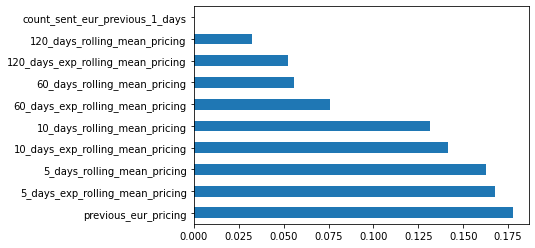

In [63]:
#full model
pd.Series(full_model.feature_importances_, index=predictors.columns).nlargest(10).plot(kind='barh')

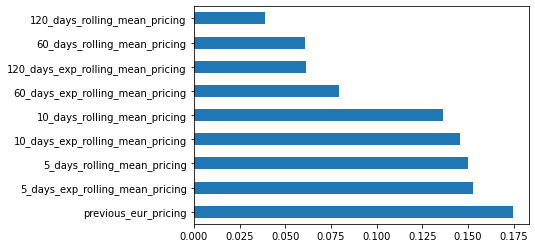

In [72]:
#eur pricing model only
pd.Series(eur_model.feature_importances_, index=predictors_eur_pricing.columns).nlargest(10).plot(kind='barh')
plt.savefig('results/figures/eur_only_model_features_importance.jpg')

<AxesSubplot:>

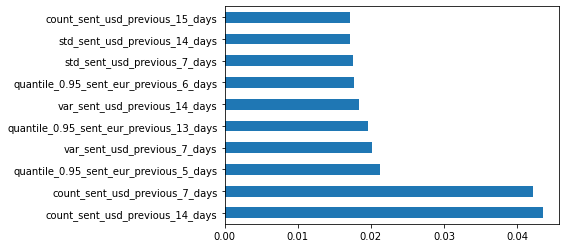

In [65]:
#twitter predictors only
pd.Series(twitter_model.feature_importances_, index=predictors_twitter.columns).nlargest(10).plot(kind='barh')

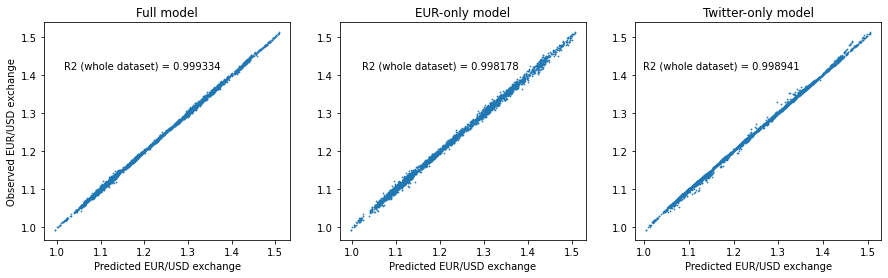

In [66]:
import matplotlib.pyplot as plt
from sklearn import metrics 

#open a plot with two panels
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))

#plot scatter against date and eur pricing
ax1.scatter(x=full_model_pred, y=y, s=0.5)
ax2.scatter(x=eur_model_pred, y=y, s=0.5)
ax3.scatter(x=twitter_model_pred, y=y, s=0.5)

#set titles and axes labels
ax1.title.set_text("Full model")
ax1.set_ylabel("Observed EUR/USD exchange")
ax1.set_xlabel("Predicted EUR/USD exchange")
ax2.title.set_text("EUR-only model")
ax2.set_xlabel("Predicted EUR/USD exchange")
ax3.title.set_text("Twitter-only model")
ax3.set_xlabel("Predicted EUR/USD exchange")


#add R2
ax1.text(0.40, 0.8, 'R2 = ' + str(np.round(metrics.r2_score(y, full_model_pred), 6)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax2.text(1.61, 0.8, 'R2 = ' + str(np.round(metrics.r2_score(y, eur_model_pred), 6)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax3.text(2.75, 0.8, 'R2 = ' + str(np.round(metrics.r2_score(y, twitter_model_pred), 6)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)

#close
plt.show()

The full model works best, followed by the Twitter-only model and the EUR-only model, but note that this considers the whole dataset and no CV was perfomed in order to get these R<sup>2</sup> values.

## Simplest model

Model considering the EUR pricing (EUR/USD exchange rate) of the previous day as the value of the current day: 

In [67]:
metrics.r2_score(y, df_merged["previous_eur_pricing"].values)

0.9968533411678203

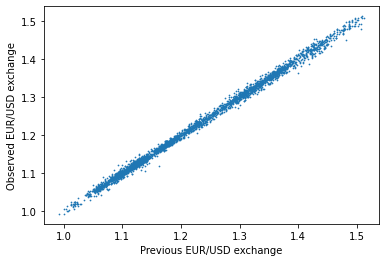

In [71]:
#plot scatter against date and eur pricing
plt.scatter(x=df_merged["previous_eur_pricing"], y=y, s=0.5)
plt.xlabel("Previous EUR/USD exchange")
plt.ylabel("Observed EUR/USD exchange")
plt.savefig('results/figures/eur_pricing_vs_previous_day.jpg')